In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log_data = pd.read_csv("/content/drive/MyDrive/코멘토 직무캠프 과제/_SELECT_FROM_SELECT_WID_COUNT_login_count_MAX_level_level_FROM_p_202310191527.csv")

In [3]:
log_data.describe()

,login_count,level
count,10953.000000,10953.000000
mean,68.839861,10.769013
std,406.837455,11.808474
min,1.000000,1.000000
25%,3.000000,1.000000
50%,8.000000,6.000000
75%,30.000000,16.000000
max,30227.000000,65.000000


In [4]:
log_c = log_data.copy()

In [5]:
log_c['level_grade'] = np.where(log_c['level'] >= 25, 'S',
                                np.where(log_c['level'] >= 16, 'A',
                                np.where(log_c['level'] >= 10, 'B',
                                np.where(log_c['level'] >= 6, 'C', 'D'))))

In [6]:
grade_check = log_c['level_grade'].value_counts().sort_values(ascending = False)
grade_check

D    5076
B    1699
A    1491
S    1447
C    1240
Name: level_grade, dtype: int64

<Axes: >

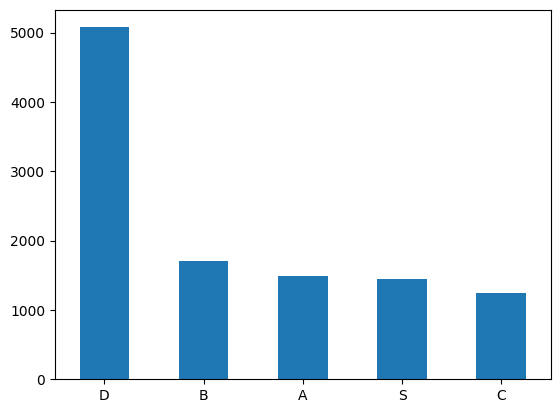

In [7]:
grade_check.plot.bar(rot = 0)

In [8]:
log_c.head()

,WID,login_count,level,level_grade
0,W10001,2,5,D
1,W10002,1,1,D
2,W10003,1,1,D
3,W10004,12,14,B
4,W10005,31,11,B


In [9]:
log_corr = log_c.corr()
log_corr

<ipython-input-9-738fd89d7ae6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  log_corr = log_c.corr()


,login_count,level
login_count,1.00000,0.38627
level,0.38627,1.00000


In [10]:
log_level = log_c[['level', 'login_count']]
log_level.head()

,level,login_count
0,5,2
1,1,1
2,1,1
3,14,12
4,11,31


In [11]:
log_co = log_level.corr()
log_co #접속을 많이 하는데 레벨이 낮은 사람이 많다.

,level,login_count
level,1.00000,0.38627
login_count,0.38627,1.00000


In [12]:
play_data = pd.read_csv("/content/drive/MyDrive/코멘토 직무캠프 과제/_SELECT_T1_playcount_sum_playtime_sum_FROM_SELECT_FROM_SELECT_WI_202310191617.csv")
play_data.describe()

,login_count,level,playcount_sum,playtime_sum
count,8892.000000,8892.000000,8892.000000,8.892000e+03
mean,83.909807,12.982681,84.347841,4.705222e+04
std,450.186269,12.054376,327.523439,1.667677e+05
min,1.000000,1.000000,1.000000,0.000000e+00
25%,5.000000,3.000000,2.000000,1.604000e+03
50%,12.000000,10.000000,6.000000,5.371000e+03
75%,41.000000,19.000000,32.000000,2.252375e+04
max,30227.000000,65.000000,6163.000000,2.718399e+06


In [13]:
play_c = play_data.copy()

In [14]:
play_c.head()

,WID,login_count,level,playcount_sum,playtime_sum
0,W10001,2,5,2,397
1,W10004,12,14,6,6411
2,W10005,31,11,5,3871
3,W10006,13,12,12,5151
4,W10007,17,14,7,4532


In [15]:
play_c['level_grade'] = np.where(play_c['level'] >= 25, 'S',
                                np.where(play_c['level'] >= 16, 'A',
                                np.where(play_c['level'] >= 10, 'B',
                                np.where(play_c['level'] >= 6, 'C', 'D'))))
play_c.head()

,WID,login_count,level,playcount_sum,playtime_sum,level_grade
0,W10001,2,5,2,397,D
1,W10004,12,14,6,6411,B
2,W10005,31,11,5,3871,B
3,W10006,13,12,12,5151,B
4,W10007,17,14,7,4532,B


In [16]:
play_co = play_c.corr()
play_co

<ipython-input-16-177129792f47>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  play_co = play_c.corr()


,login_count,level,playcount_sum,playtime_sum
login_count,1.000000,0.388313,0.565347,0.610824
level,0.388313,1.000000,0.611806,0.642143
playcount_sum,0.565347,0.611806,1.000000,0.965802
playtime_sum,0.610824,0.642143,0.965802,1.000000


In [17]:
from scipy import stats
level = play_c['level']
playtime = play_c['playtime_sum']
stats.ttest_ind(level, playtime, equal_var = True)

TtestResult(statistic=-26.59794174239947, pvalue=6.937293987321878e-153, df=17782.0)

In [18]:
play_cor = round(play_co, 2)

In [19]:
play_cor

,login_count,level,playcount_sum,playtime_sum
login_count,1.00,0.39,0.57,0.61
level,0.39,1.00,0.61,0.64
playcount_sum,0.57,0.61,1.00,0.97
playtime_sum,0.61,0.64,0.97,1.00


In [20]:
plt.rcParams.update({'figure.dpi' : '120', 'figure.figsize' : [7.5, 5.5]})

<Axes: >

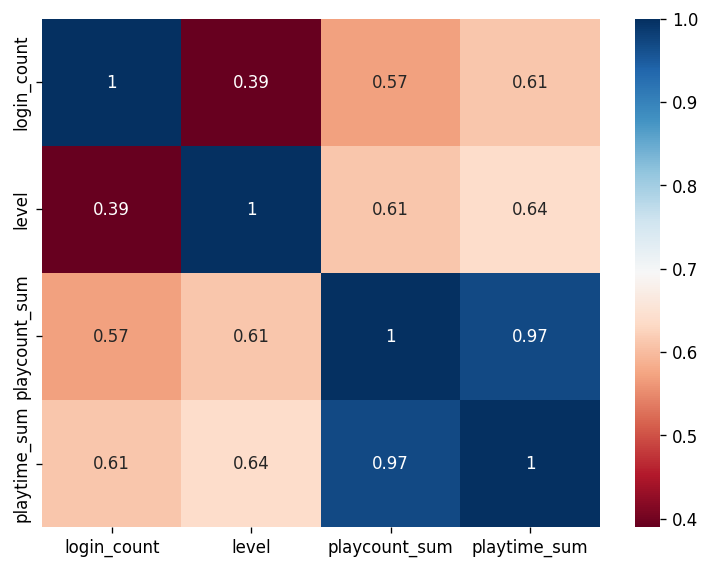

In [21]:
sns.heatmap(play_cor, annot = True, cmap = 'RdBu')

In [22]:
p_data = play_data.copy()
p_data.head()

,WID,login_count,level,playcount_sum,playtime_sum
0,W10001,2,5,2,397
1,W10004,12,14,6,6411
2,W10005,31,11,5,3871
3,W10006,13,12,12,5151
4,W10007,17,14,7,4532


In [23]:
x = p_data[['login_count', 'level', 'playcount_sum', 'playtime_sum']].to_numpy()

In [24]:
print(x)

[[    2     5     2   397]
 [   12    14     6  6411]
 [   31    11     5  3871]
 ...
 [   15    16     7 10299]
 [    6     1     3   690]
 [    2     1     1  1527]]


In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 20, random_state = 42)
km.fit(x)
labels = km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
print(km.labels_[2])

1


In [27]:
print(km.cluster_centers_)

[[3.81386965e+02 3.72118126e+01 3.97138493e+02 2.17091065e+05]
 [3.05284613e+01 1.04957767e+01 2.10298690e+01 1.35924595e+04]
 [4.09011111e+03 5.78333333e+01 3.96016667e+03 2.23762167e+06]
 [8.96289308e+02 4.66729560e+01 1.08984277e+03 5.82401629e+05]
 [1.69720000e+03 5.39818182e+01 2.52118182e+03 1.23419522e+06]]


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_t = pca.fit_transform(x)

In [29]:
pl_d = p_data.copy()

In [30]:
pl_d['pca_x'] = pca_t[:,0]
pl_d['pca_y'] = pca_t[:,1]
pl_d['cluster'] = labels
print(pl_d)

         WID  login_count  level  playcount_sum  playtime_sum         pca_x  \
0     W10001            2      5              2           397 -46655.359812   
1     W10004           12     14              6          6411 -40641.354319   
2     W10005           31     11              5          3871 -43181.317000   
3     W10006           13     12             12          5151 -41901.337401   
4     W10007           17     14              7          4532 -42520.338241   
...      ...          ...    ...            ...           ...           ...   
8887  W20948           13      3              3          1632 -45420.343772   
8888  W20949            5      1              3          1501 -45551.356642   
8889  W20950           15     16              7         10299 -36753.359666   
8890  W20951            6      1              3           690 -46362.352431   
8891  W20952            2      1              1          1527 -45525.365464   

          pca_y  cluster  
0     -5.161870        1

In [31]:
d0 = pl_d[pl_d['cluster'] == 0].index
d1 = pl_d[pl_d['cluster'] == 1].index
d2 = pl_d[pl_d['cluster'] == 2].index
d3 = pl_d[pl_d['cluster'] == 3].index
d4 = pl_d[pl_d['cluster'] == 4].index

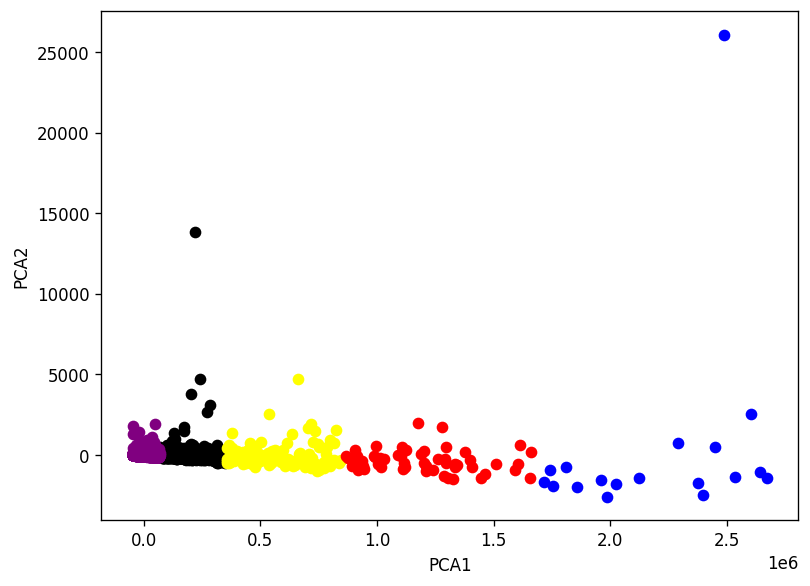

In [32]:
plt.scatter(x = pl_d.loc[d0, 'pca_x'], y = pl_d.loc[d0, 'pca_y'], color = 'black')
plt.scatter(x = pl_d.loc[d1, 'pca_x'], y = pl_d.loc[d1, 'pca_y'], color = 'purple')
plt.scatter(x = pl_d.loc[d2, 'pca_x'], y = pl_d.loc[d2, 'pca_y'], color = 'blue')
plt.scatter(x = pl_d.loc[d3, 'pca_x'], y = pl_d.loc[d3, 'pca_y'], color = 'yellow')
plt.scatter(x = pl_d.loc[d4, 'pca_x'], y = pl_d.loc[d4, 'pca_y'], color = 'red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [33]:
pl_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WID            8892 non-null   object 
 1   login_count    8892 non-null   int64  
 2   level          8892 non-null   int64  
 3   playcount_sum  8892 non-null   int64  
 4   playtime_sum   8892 non-null   int64  
 5   pca_x          8892 non-null   float64
 6   pca_y          8892 non-null   float64
 7   cluster        8892 non-null   int32  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 521.1+ KB


In [34]:
pl_d.describe()

,login_count,level,playcount_sum,playtime_sum,pca_x,pca_y,cluster
count,8892.000000,8892.000000,8892.000000,8.892000e+03,8.892000e+03,8.892000e+03,8892.000000
mean,83.909807,12.982681,84.347841,4.705222e+04,0.000000e+00,-5.676671e-15,1.001125
std,450.186269,12.054376,327.523439,1.667677e+05,1.667682e+05,3.565957e+02,0.429482
min,1.000000,1.000000,1.000000,0.000000e+00,-4.705236e+04,-2.573211e+03,0.000000
25%,5.000000,3.000000,2.000000,1.604000e+03,-4.544835e+04,-1.015390e+01,1.000000
50%,12.000000,10.000000,6.000000,5.371000e+03,-4.168135e+04,-5.041727e+00,1.000000
75%,41.000000,19.000000,32.000000,2.252375e+04,-2.452852e+04,1.356095e+00,1.000000
max,30227.000000,65.000000,6163.000000,2.718399e+06,2.671354e+06,2.608175e+04,4.000000


In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [36]:
pl_new = pl_d.drop(labels = 'WID', axis = 1)
pl_new.head()

,login_count,level,playcount_sum,playtime_sum,pca_x,pca_y,cluster
0,2,5,2,397,-46655.359812,-5.161870,1
1,12,14,6,6411,-40641.354319,-4.856066,1
2,31,11,5,3871,-43181.317000,18.206666,1
3,13,12,12,5151,-41901.337401,-2.033031,1
4,17,14,7,4532,-42520.338241,3.100622,1


In [37]:
score_s = silhouette_samples(pl_new, pl_new['cluster'])
print(score_s)
pl_new['silhouette_coeff'] = score_s

[0.93893669 0.94256765 0.94402849 ... 0.93649101 0.93992668 0.94216959]


In [38]:
a_score = silhouette_score(pl_new, pl_new['cluster'])
print(a_score)

0.8640138870418906


In [39]:
print(pl_new.groupby('cluster')['silhouette_coeff'].mean())

cluster
0    0.474979
1    0.897346
2    0.540999
3    0.508008
4    0.521144
Name: silhouette_coeff, dtype: float64


In [40]:
cluster_count = pl_d['cluster'].value_counts().sort_index()

In [41]:
cluster_count

0     491
1    8169
2      18
3     159
4      55
Name: cluster, dtype: int64

<Axes: >

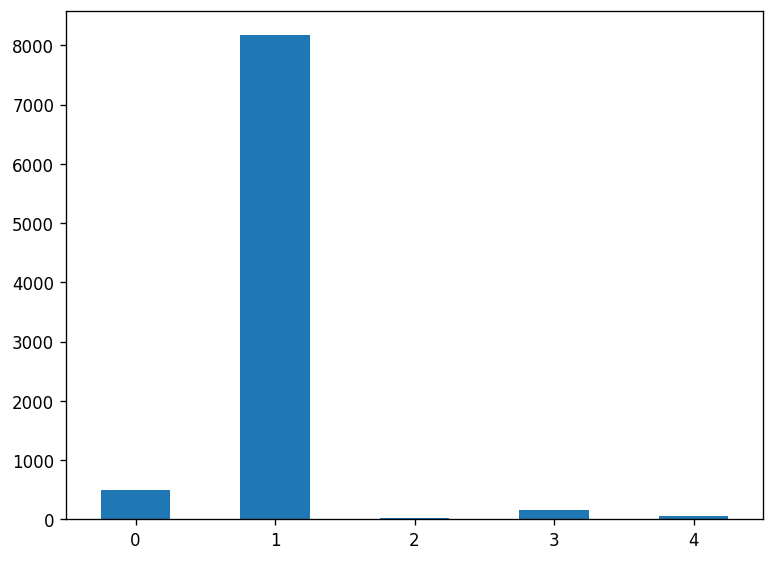

In [42]:
cluster_count.plot.bar(rot = 0)

In [43]:
pl_dc1 = pl_d.query('cluster == 1')

In [44]:
pl_dc1.describe()

,login_count,level,playcount_sum,playtime_sum,pca_x,pca_y,cluster
count,8169.000000,8169.000000,8169.000000,8169.000000,8169.000000,8169.000000,8169.0
mean,30.528461,10.495777,21.029869,13592.459542,-33459.858568,1.785787,1.0
std,72.474981,8.713037,37.998232,21214.663092,21214.726861,61.514251,0.0
min,1.000000,1.000000,1.000000,0.000000,-47052.362289,-146.740564,1.0
25%,4.000000,3.000000,2.000000,1556.000000,-45496.362258,-8.815529,1.0
50%,10.000000,9.000000,5.000000,4395.000000,-42657.364810,-4.825390,1.0
75%,29.000000,16.000000,21.000000,15035.000000,-32017.359161,1.164240,1.0
max,2066.000000,39.000000,356.000000,115277.000000,68225.074478,1902.900841,1.0


In [45]:
pl_dc2 = pl_d.query('cluster == 2')
pl_dc2.describe()

,login_count,level,playcount_sum,playtime_sum,pca_x,pca_y,cluster
count,18.000000,18.000000,18.000000,1.800000e+01,1.800000e+01,18.000000,18.0
mean,4090.111111,57.833333,3960.166667,2.237622e+06,2.190576e+06,402.404858,2.0
std,6702.563872,10.433261,1388.065317,3.401519e+05,3.401565e+05,6528.147560,0.0
min,732.000000,19.000000,1617.000000,1.762522e+06,1.715469e+06,-2573.211061,2.0
25%,1556.000000,57.500000,3158.000000,1.930216e+06,1.883167e+06,-1763.984162,2.0
50%,2239.500000,60.000000,4052.000000,2.254792e+06,2.207748e+06,-1439.510002,2.0
75%,3340.250000,63.250000,4800.500000,2.525017e+06,2.478001e+06,-785.814573,2.0
max,30227.000000,65.000000,6163.000000,2.718399e+06,2.671354e+06,26081.753522,2.0


In [46]:
pl_dc0 = pl_d.query('cluster == 0')
pl_dc0.describe()

,login_count,level,playcount_sum,playtime_sum,pca_x,pca_y,cluster
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.0
mean,381.386965,37.211813,397.138493,217091.065173,170039.397294,17.381394,0.0
std,757.149526,5.883906,208.226293,80023.942579,80024.243716,743.820347,0.0
min,28.000000,10.000000,93.000000,115520.000000,68467.733758,-494.858376,0.0
25%,168.000000,35.000000,238.500000,148004.500000,100952.377325,-156.538985,0.0
50%,253.000000,38.000000,348.000000,196774.000000,149721.650095,-82.491637,0.0
75%,417.000000,41.000000,506.500000,271047.500000,223995.537149,19.596393,0.0
max,14287.000000,52.000000,1312.000000,398760.000000,351708.624172,13844.838750,0.0


In [47]:
pl_dc3 = pl_d.query('cluster == 3')
pl_dc3.describe()

,login_count,level,playcount_sum,playtime_sum,pca_x,pca_y,cluster
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.0
mean,896.289308,46.672956,1089.842767,582401.628931,535350.970256,-70.034494,3.0
std,718.904972,4.954856,394.768632,137748.794885,137749.303919,657.938539,0.0
min,155.000000,10.000000,332.000000,404066.000000,357013.773331,-962.034315,3.0
25%,478.500000,44.000000,810.000000,471343.500000,424292.867382,-400.797677,3.0
50%,680.000000,46.000000,1028.000000,533674.000000,486622.230382,-251.572424,3.0
75%,1007.500000,50.000000,1372.500000,686606.000000,639554.517293,73.429734,3.0
max,5862.000000,56.000000,2395.000000,892841.000000,845791.027846,4697.747634,3.0


In [48]:
pl_dc4 = pl_d.query('cluster == 4')
pl_dc4.describe()

,login_count,level,playcount_sum,playtime_sum,pca_x,pca_y,cluster
count,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,55.000000,55.0
mean,1697.200000,53.981818,2521.181818,1.234195e+06,1.187147e+06,-349.639230,4.0
std,733.249121,4.820830,677.681371,2.233929e+05,2.233934e+05,681.803930,0.0
min,645.000000,36.000000,937.000000,9.133990e+05,8.663499e+05,-1465.555924,4.0
25%,1202.500000,52.000000,1994.000000,1.040958e+06,9.939097e+05,-729.698055,4.0
50%,1563.000000,54.000000,2507.000000,1.234534e+06,1.187487e+06,-462.931607,4.0
75%,1965.000000,57.000000,2883.500000,1.376999e+06,1.329950e+06,-35.409780,4.0
max,4011.000000,62.000000,4487.000000,1.709503e+06,1.662457e+06,1975.856115,4.0
